In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("CS.csv")

In [3]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
df.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
61879,465939,Female,No,32,Yes,Engineer,0.0,Low,2.0,Cat_6,D
61880,467118,Male,Yes,55,Yes,Entertainment,1.0,Average,3.0,Cat_7,B
61881,463815,Male,Yes,37,Yes,Entertainment,0.0,Average,2.0,Cat_6,C
61882,460871,Female,No,27,Yes,Healthcare,NaN,Low,NaN,Cat_6,D
61883,459127,Male,No,43,Yes,Healthcare,1.0,Low,7.0,Cat_6,D


In [5]:
df=df.drop(['Var_1','ID'], axis=1)

In [6]:
df['Segmentation'].value_counts()

Segmentation
D    17635
A    15201
C    15145
B    13903
Name: count, dtype: int64

In [7]:
df.isnull().sum()

Gender                0
Ever_Married       1063
Age                   0
Graduated           614
Profession          961
Work_Experience    6427
Spending_Score        0
Family_Size        2615
Segmentation          0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

In [10]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Segmentation'],
      dtype='object')

In [11]:
X = df[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession','Work_Experience', 'Spending_Score', 'Family_Size']]
y = df['Segmentation']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Define columns and transformers for preprocessing
numeric_features = ['Age', 'Work_Experience', 'Family_Size']
categorical_features = ['Gender', 'Ever_Married','Graduated', 'Profession','Spending_Score']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with median
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),  # One-hot encode categorical variables
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

In [14]:
from sklearn.ensemble import RandomForestClassifier
# Create a pipeline with preprocessing and the classifier
RF = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier())])
# Train the model
RF.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RF.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9344421748857115
Precision: 0.9338053457078622
Recall: 0.9330832336908912
F1 Score: 0.9333492150448934


In [15]:
from sklearn.tree import DecisionTreeClassifier
DT = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier())])  # Change the classifier here

# Train the model
DT.fit(X_train, y_train)

# Make predictions on the test set
y_pred =DT.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9332749732516292
Precision: 0.9324778917506569
Recall: 0.932065630569104
F1 Score: 0.9322336929719035


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', KNeighborsClassifier())])  # Change the classifier here

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred =knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8950491197354343
Precision: 0.8936209486951825
Recall: 0.8937195434413866
F1 Score: 0.893659349917354


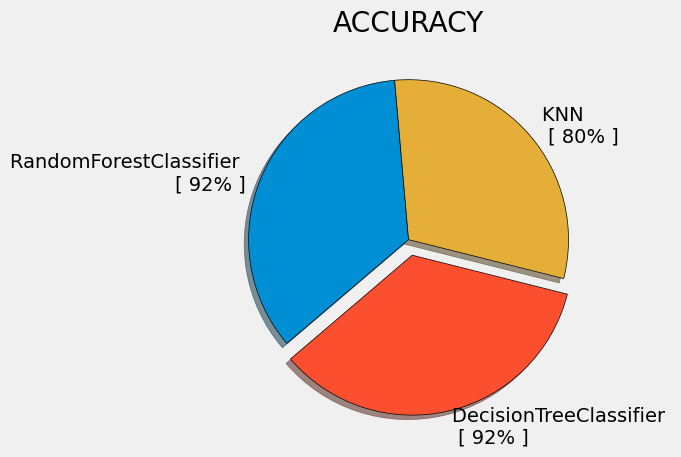

In [17]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Language Popularity
#python is not good with a lot of data so we shall modify our list to top 5 languages.
slices = [92, 92, 80]
labels = ['RandomForestClassifier \n [ 92% ]','DecisionTreeClassifier \n [ 92% ]',  'KNN \n [ 80% ]']
explode = [0,0.1, 0] #this puts an emphasis on python

plt.pie(slices, labels = labels, explode = explode, 
        #shadow = True for asthetics to add a shadow to our plot
        shadow = True,
        #startangle = 90, rotates the original chart by 90 degress
        startangle = 95,
        wedgeprops = {'edgecolor': 'black'})

#wedgeprops is to put a boundary where the two colors meet.
#more on the matplotlib wedge documentation for more customisations.

plt.title('ACCURACY')
plt.tight_layout()
plt.show()

In [18]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
...,...,...,...,...,...,...,...,...,...
61877,Female,Yes,53,Yes,Marketing,6.0,Low,1.0,D
61879,Female,No,32,Yes,Engineer,0.0,Low,2.0,D
61880,Male,Yes,55,Yes,Entertainment,1.0,Average,3.0,B
61881,Male,Yes,37,Yes,Entertainment,0.0,Average,2.0,C


In [19]:
new_data = {'Gender': 'Male',
            'Ever_Married': 'No',
            'Age': 22,
            'Graduated': 'No',
            'Profession':'Healthcare',
            'Work_Experience': 1,
            'Spending_Score': 'Low',
            'Family_Size': 4}

# Create a DataFrame from the input data
new_df = pd.DataFrame([new_data])

# Use the trained model to make predictions
prediction = DT.predict(new_df)

# Print the predicted result
print(f'Predicted: {prediction[0]}')


Predicted: D


In [20]:
new_data = {'Gender': 'Female',
            'Ever_Married': 'Yes',
            'Age': 67,
            'Graduated': 'Yes',
            'Profession':'Engineer',
            'Work_Experience': 1,
            'Spending_Score': 'Low',
            'Family_Size': 1}

# Create a DataFrame from the input data
new_df = pd.DataFrame([new_data])

# Use the trained model to make predictions
prediction = DT.predict(new_df)

# Print the predicted result
print(f'Predicted: {prediction[0]}')


Predicted: A


In [21]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_filename = 'DT.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_filename, 'wb')
pickle.dump(DT, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()